# Derivatives

We have seen during the lecture that computer derivatives are crucial, particularly for things like machine learning.


<img src="autodiff_edit.png" alt="drawing" width="50%"/>
Image from Güneş Baydin et al, [JMLR 18 (2018) 1--43](https://jmlr.org/papers/v18/17-468.html)


In [8]:
import numpy as np
import math
import matplotlib.pyplot as plt


In [9]:
import math
class DualNumber:
        def __init__(self, primal, tangent=0):
                self.primal=primal
                self.tangent=tangent
        def __add__(self, other):
                return ...
        def __rmul__(self, a):
                return ...
        def __mul__(self, other):
                return ...
            
def sin(val):
        return DualNumber(...)

            
def func(x,y):
        return 2*x + x*sin(y) + y*y*y
x = DualNumber(1., 1.)
y = DualNumber(2.)
z = func(x, y)
print("z =", z.primal)
print("dc/dx =", z.tangent)

TypeError: unsupported operand type(s) for +: 'ellipsis' and 'ellipsis'

In [10]:
def f(x0, x1):
    return 2*x0 + x0*np.sin(x1)+ x1**3

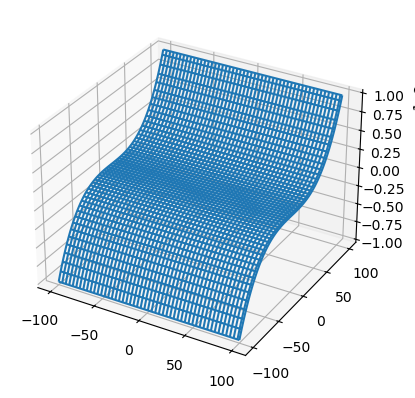

In [11]:
x0 = np.linspace(-100,100, 100)
x1 = np.linspace(-100,100,100)
X0, X1 = np.meshgrid(x0, x1)
Y = f(X0, X1)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.plot_wireframe(X0, X1, Y, color="C0")

TypeError: unsupported operand type(s) for ** or pow(): 'DualNumber' and 'int'

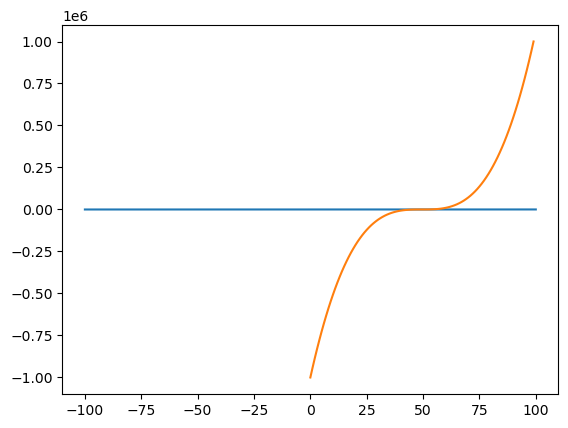

In [12]:
plt.plot(x0, x1, f(x0, x1))


y = np.arange(-5, 5, 0.5)
X, Y = np.meshgrid(x, y)
R = np.sqrt(X**2 + Y**2)
Z = np.sin(R)

# Default behavior is axlim_clip=False
ax.plot_wireframe(X, Y, Z, color='C0')

# When axlim_clip=True, note that when a line segment has one vertex outside
# the view limits, the entire line is hidden. The same is true for 3D patches
# if one of their vertices is outside the limits (not shown).
ax.plot_wireframe(X, Y, Z, color='C1', axlim_clip=True)

# In this example, data where x < 0 or z > 0.5 is clipped
ax.set(xlim=(0, 10), ylim=(-5, 5), zlim=(-1, 0.5))
ax.legend(['axlim_clip=False (default)', 'axlim_clip=True'])

plt.show()


Now let's modify the function, to make it a function of only one variable, for easier visualization


In [14]:
def f_math(x):
    return 2 + 3*math.sin(x) + x**3

def f(x):
    return 2 + 3*np.sin(x) + x*x*x

In [15]:
x = np.linspace(-10,10, 10)

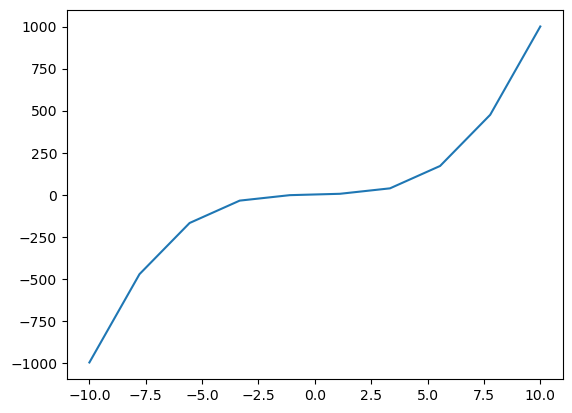

In [17]:
plt.plot(x, f(x))

Now let's calculate the analytical derivative

In [18]:
def anal_deriv(x):
    return 3*np.cos(x)+ 3*x**2



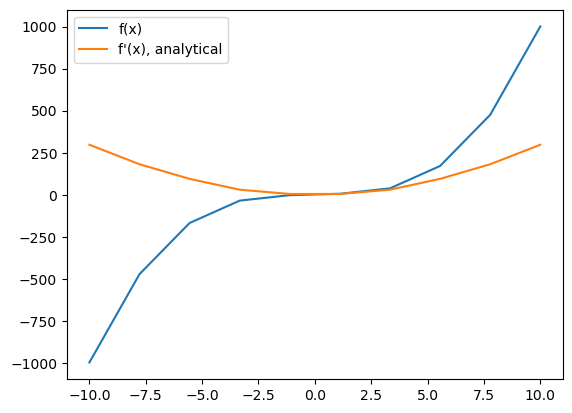

In [19]:
plt.plot(x, f(x), label="f(x)")
plt.plot(x, anal_deriv(x), label="f'(x), analytical")
plt.legend()

In [20]:
import sympy

symbolic_x = sympy.symbols('x')
symbolic_func = f(symbolic_x)
symbolic_func

sym_y = sympy.lambdify(symbolic_x,symbolic_func)(x)


TypeError: loop of ufunc does not support argument 0 of type Symbol which has no callable sin method

In [21]:
import sympy

symbolic_x = sympy.symbols('x')
symbolic_func = f_math(symbolic_x)
symbolic_func

sym_y = sympy.lambdify(symbolic_x,symbolic_func)(x)


TypeError: Cannot convert expression to float

In [22]:
def f_sympy(x):
    return 2 + 3*sympy.sin(x)+ x**3
symbolic_x = sympy.symbols('x')
symbolic_func = f_sympy(symbolic_x)


sym_y = sympy.lambdify(symbolic_x,symbolic_func)(x)


In [23]:

def num_deriv(x, h):
    return (f(x+h)-f(x))/h

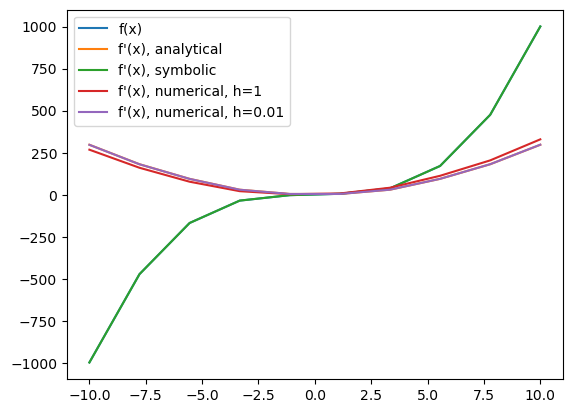

In [24]:
plt.plot(x, [f(xi) for xi in x], label="f(x)")
plt.plot(x, anal_deriv(x), label="f'(x), analytical")
plt.plot(x, sympy.lambdify(symbolic_x,symbolic_func)(x), label="f'(x), symbolic")
plt.plot(x, num_deriv(x, 1), label="f'(x), numerical, h=1")
plt.plot(x, num_deriv(x, 0.01), label="f'(x), numerical, h=0.01")
plt.legend()

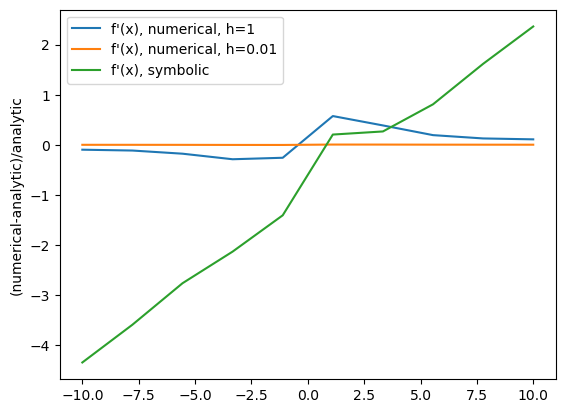

In [25]:
plt.plot(x, (num_deriv(x, 1)-anal_deriv(x))/anal_deriv(x), label="f'(x), numerical, h=1")
plt.plot(x, (num_deriv(x, 0.01)-anal_deriv(x))/anal_deriv(x), label="f'(x), numerical, h=0.01")
plt.plot(x, (sympy.lambdify(symbolic_x,symbolic_func)(x)-anal_deriv(x))/anal_deriv(x), label="f'(x), symbolic")
plt.ylabel("(numerical-analytic)/analytic")
plt.legend()

In [26]:
class DualNumber:
        def __init__(self, primal, tangent=0):
                self.primal=primal
                self.tangent=tangent
        def __add__(self, other):
                return DualNumber(  
                        self.primal+other.primal, self.tangent+other.tangent)
        def __rmul__(self, a):
                return DualNumber(
                        self.primal*a, self.tangent*a)
        def __mul__(self, other):
                return DualNumber(
                        self.primal*other.primal, self.primal*other.tangent+ self.tangent*other.primal)
def sin(val):
        return DualNumber(
                math.sin(val.primal),
                math.cos(val.primal)*val.tangent)

def f_withduals(xs):
    return np.array( [ DualNumber(2,0) + DualNumber(3, 0)*sin(x)+ x*x*x for x in xs] )

x_dual = [ DualNumber(xi, 1.) for xi in x  ]

z = f_withduals(x_dual)

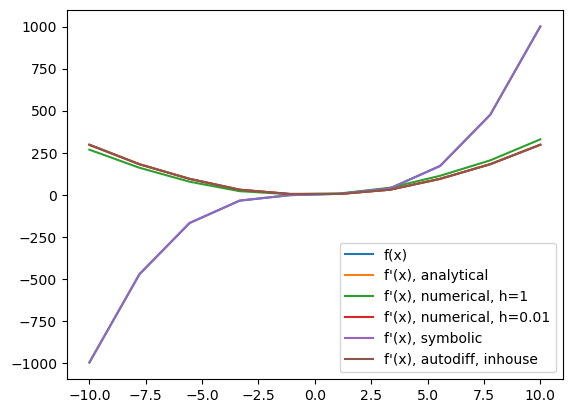

In [27]:


plt.plot(x, f(x), label="f(x)")
plt.plot(x, anal_deriv(x), label="f'(x), analytical")
plt.plot(x, num_deriv(x, 1), label="f'(x), numerical, h=1")
plt.plot(x, num_deriv(x, 0.01), label="f'(x), numerical, h=0.01")
plt.plot(x, sympy.lambdify(symbolic_x,symbolic_func)(x), label="f'(x), symbolic")
plt.plot(x, [xi.tangent for xi in f_withduals(x_dual)], label="f'(x), autodiff, inhouse")
plt.legend()

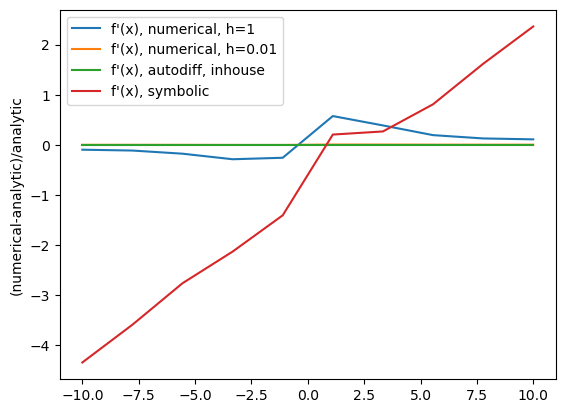

In [28]:
plt.plot(x, (num_deriv(x, 1)-anal_deriv(x))/anal_deriv(x), label="f'(x), numerical, h=1")
plt.plot(x, (num_deriv(x, 0.01)-anal_deriv(x))/anal_deriv(x), label="f'(x), numerical, h=0.01")
plt.plot(x, ([xi.tangent for xi in f_withduals(x_dual)]-anal_deriv(x))/anal_deriv(x), label="f'(x), autodiff, inhouse")
plt.plot(x, (sympy.lambdify(symbolic_x,symbolic_func)(x)-anal_deriv(x))/anal_deriv(x), label="f'(x), symbolic")

plt.ylabel("(numerical-analytic)/analytic")
plt.legend()

In [29]:
import torch

In [30]:
xt = torch.tensor(x, requires_grad=False)

f_torch = 2 + 3*torch.sin(xt)+ xt**3

In [31]:
f_torch.backward(torch.ones_like(f_torch))
print(xt.grad)

RuntimeError: element 0 of tensors does not require grad and does not have a grad_fn

In [32]:
xt = torch.tensor(x, requires_grad=True)

f_torch = 2 + 3*torch.sin(xt)+ xt**3

In [33]:
f_torch.backward(torch.ones_like(f_torch))
print(xt.grad)

tensor([297.4828, 181.7099,  94.8329,  30.3883,   5.0347,   5.0347,  30.3883,
         94.8329, 181.7099, 297.4828], dtype=torch.float64)


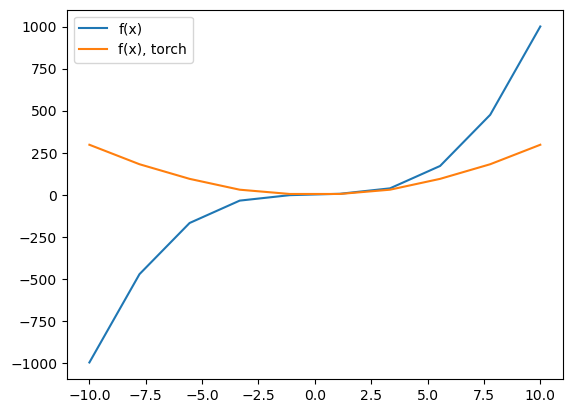

In [34]:
    
plt.plot(x, f(x), label="f(x)")
plt.plot(xt.detach().numpy(), xt.grad.detach().numpy(), label="f(x), torch")
plt.legend()

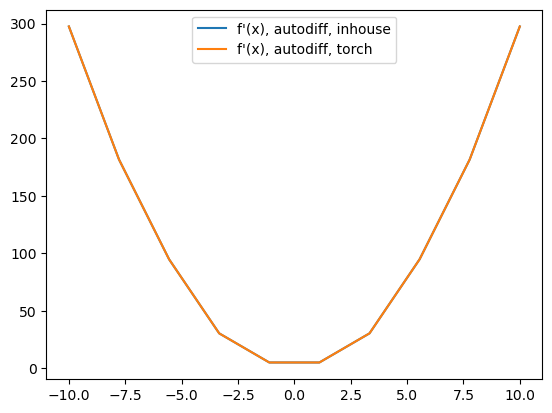

In [35]:
plt.plot(x, [xi.tangent for xi in f_withduals(x_dual)], label="f'(x), autodiff, inhouse")
plt.plot(xt.detach().numpy(), xt.grad, label="f'(x), autodiff, torch")

plt.legend()

Not bad!!!

What about timing?



In [36]:
from timeit import timeit


In [39]:
print("Function:", timeit('f(x)', globals=globals()))
print("Analytic derivative:", timeit('anal_deriv(x)', globals=globals()))
print("Numerical derivative, h=1:", timeit('num_deriv(x, 1)', globals=globals()))
print("Numerical derivative, h=0.01:", timeit('num_deriv(x, 0.01)', globals=globals()))
#print("Symbolic derivative:", timeit('sympy.lambdify(symbolic_x,symbolic_func)(x)', globals=globals()))
print("Autodiff, inhouse:", timeit('[xi.tangent for xi in f_withduals(x_dual)]', globals=globals()))
print("Autodiff, torch:", timeit('f_torch.backward(torch.ones_like(f_torch));xt.grad', globals=globals()))


Function: 1.9745324999676086
Analytic derivative: 1.7156480409903452
Numerical derivative, h=1: 5.354405332996976
Numerical derivative, h=0.01: 5.027340958011337
Autodiff, inhouse: 22.20946433302015


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [41]:
xtn = torch.tensor(x, requires_grad=True)
f_torchn = 2 + 3*torch.sin(xtn)+ xtn**3

print("Function:", timeit('f(x)', globals=globals()))
print("Analytic derivative:", timeit('anal_deriv(x)', globals=globals()))
print("Numerical derivative, h=1:", timeit('num_deriv(x, 1)', globals=globals()))
print("Numerical derivative, h=0.01:", timeit('num_deriv(x, 0.01)', globals=globals()))
#print("Symbolic derivative:", timeit('sympy.lambdify(symbolic_x,symbolic_func)(x)', globals=globals()))
print("Autodiff, inhouse:", timeit('[xi.tangent for xi in f_withduals(x_dual)]', globals=globals()))
print("Autodiff, torch:", timeit('f_torchn.backward(torch.ones_like(f_torchn));xtn.grad', globals=globals()))


Function: 1.9933225000277162
Analytic derivative: 1.6866355419624597
Numerical derivative, h=1: 5.074446416052524
Numerical derivative, h=0.01: 4.925972709024791
Autodiff, inhouse: 21.712582834006753


RuntimeError: Trying to backward through the graph a second time (or directly access saved tensors after they have already been freed). Saved intermediate values of the graph are freed when you call .backward() or autograd.grad(). Specify retain_graph=True if you need to backward through the graph a second time or if you need to access saved tensors after calling backward.

In [49]:
xt = torch.tensor(x, requires_grad=True).to(torch.device("mps"))

def anal_d(x):
    return anal_deriv(x)
def num_d(x, h):
    return num_deriv(x,h)
def adin_d(x_dual):
    return [xi.tangent for xi in f_withduals(x_dual)] 
def adtorch_d(xt):
    f_torchn = 2 + 3*torch.sin(xtn)+ xtn**3
    f_torchn.backward(torch.ones_like(f_torchn))

print("Function:", timeit('f(x)', globals=globals()))
print("Analytic derivative:", timeit('anal_d(x)', globals=globals()))
print("Numerical derivative, h=1:", timeit('num_d(x, 1)', globals=globals()))
print("Numerical derivative, h=0.01:", timeit('num_d(x, 0.01)', globals=globals()))
#print("Symbolic derivative:", timeit('sympy.lambdify(symbolic_x,symbolic_func)(x)', globals=globals()))
print("Autodiff, inhouse:", timeit('adin_d(x_dual)', globals=globals()))
print("Autodiff, torch:", timeit('adtorch_d(xt);xt.grad', globals=globals()))


TypeError: Cannot convert a MPS Tensor to float64 dtype as the MPS framework doesn't support float64. Please use float32 instead.